In [79]:

import numpy as np
y1 = np.random.poisson([5,0.1,4],size=(1000,3))
y2 = np.random.poisson([3,6,0.3],size=(1000,3))
y3 = np.random.poisson([1,6,6],size=(1000,3))
y = np.vstack([y1,y2,y3])


from bayespy.nodes import Categorical, Dirichlet, Mixture, Poisson, Gamma

beta = 1
alpha = 10
K = 10 # Number of states
(NSamples,D) = y.shape

rate_parameter = Gamma(alpha, beta, plates=(D,K))
a0 = Dirichlet(1e-3*np.ones(K))

Z = Categorical(a0, plates=(NSamples, 1))
Y = Mixture(Z, Poisson, rate_parameter)
Y.observe(y)
Z.initialize_from_random()

from bayespy.inference import VB
Q = VB(Y, rate_parameter, Z, a0)

Q.set_annealing(1)

Q.update(repeat=100, tol=1e-2)
Q.set_annealing(1)
Q.update(repeat=100, tol=1e-2)


Iteration 1: loglike=-2.495923e+04 (0.008 seconds)
Iteration 2: loglike=-2.467279e+04 (0.007 seconds)
Iteration 3: loglike=-2.279212e+04 (0.005 seconds)
Iteration 4: loglike=-1.989783e+04 (0.005 seconds)
Iteration 5: loglike=-1.914782e+04 (0.005 seconds)
Iteration 6: loglike=-1.904268e+04 (0.006 seconds)
Converged at iteration 6.


In [80]:
a0.show()

 ~ Dirichlet(alpha)
  alpha =
[ 688.66896239   81.27511654  115.69195451   86.89996273  854.47424262
  133.65308624   38.4278595   693.0906839   246.52378053   61.30435104]


In [68]:
zz = Z.get_moments()

/Users/ckemere/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


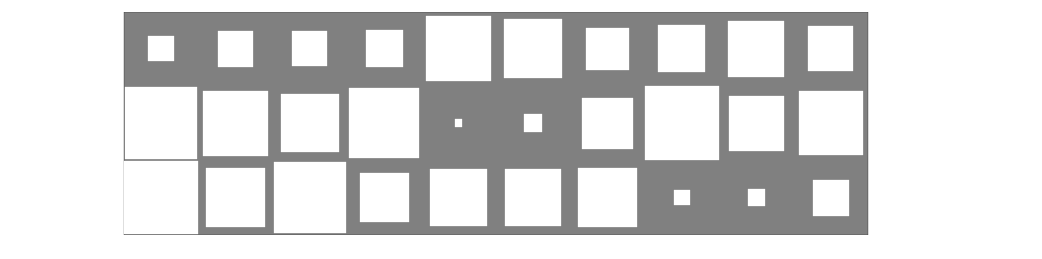

In [81]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# display place field coverage of a particular environment
sns.set(rc={'figure.figsize': (18, 4),'lines.linewidth': 2, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
import bayespy.plot as bpplt
bpplt.hinton(rate_parameter)

In [67]:
zz[0][102]

array([[  5.24031462e-05,   1.30532033e-08,   4.23022314e-09,
          3.02845026e-07,   9.99585710e-01,   4.72991529e-10,
          3.61546191e-04,   1.55877644e-08,   2.41408953e-09,
          2.34174164e-09]])